In [1]:
#Start making magic!
%matplotlib widget

In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Initial load in of the data
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#read city data and sore as a pandas df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#read ride data and sore as a pandas df
ride_data_df = pd.read_csv(ride_data_to_load)

In [6]:
#columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#count any null columns and rows
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
#get the datatypes
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(city_data_df['type']=='Urban')

66

In [11]:
sum(city_data_df['type']=='Suburban')

36

In [12]:
sum(city_data_df['type']=='Rural')

18

In [13]:
#count ride data df rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
#LOOKS GOOD!

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
#Merge the dfs into one
#We can use the common value of 'city'
#This will take the 'city data' and apply it acorss the 'ride data'
pyber_data_df =pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
pyber_data_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [19]:
#Create data frames for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [20]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
# Ride count for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [23]:
#Get the average fare by city types
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [24]:
#Get the average driver count by city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [ ]:
urban_driver_count.head()

In [ ]:
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number if Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number if Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

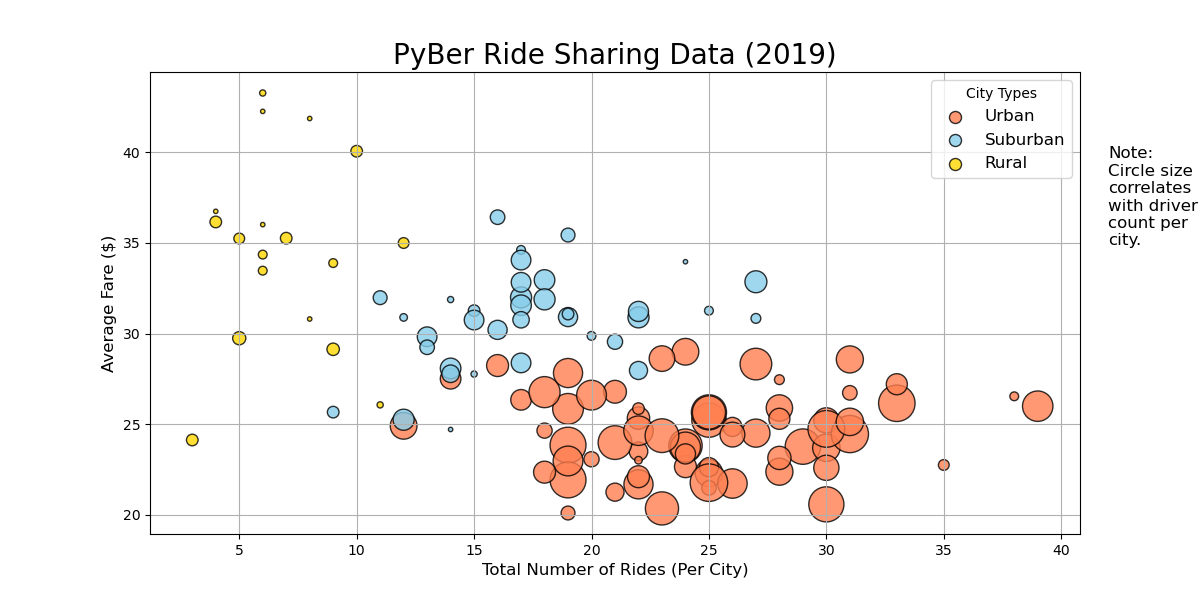

In [32]:
plt.subplots(figsize=(12,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")


plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

plt.title("PyBer Ride Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)
plt.legend()
lgnd= plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc='best', title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)
plt.show()

In [34]:
plt.savefig("Analysis/fig1.png")